### ch02-简单数字的奇特技巧

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
! ls ../datasets/

train_triplets_100000.txt  yelp_academic_dataset_business_100.json
train_triplets.txt	   yelp_academic_dataset_business.json
train_triplets.txt.zip	   yelp_academic_dataset_business.json.zip


In [4]:
# 完整数据集：http://labrosa.ee.columbia.edu/millionsong/tasteprofile
listen_count_data = pd.read_csv("../datasets/train_triplets_100000.txt",
                                header=None,
                                delimiter='\t',
                                low_memory=True)
listen_count_data.head()

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [ ]:
## 以上数据集没有进一步处理

#### Yelp 数据集的统计
- 有782种商户类别。
- 完整的数据集包含 1569264 个（约1.6M）评论和 61184 个（61K）商户。
- “餐厅”（990627个评论）和“夜生活”（210028个评论）是最流行的类别，评论计数是明智的。
- 没有一个商户同时属于餐厅和夜生活分类。因此，这两组评论之间没有重叠

In [2]:
import json
# 完整数据集 https://www.kaggle.com/yelp-dataset/yelp-dataset
# API kaggle datasets download -d yelp-dataset/yelp-dataset
yelp_data_path = "../datasets/yelp_academic_dataset_business_100000.json"


def get_json_data(file_path):
    """
    读取json数据
    """
    with open(yelp_data_path,'r') as biz_file:
        biz_df = pd.DataFrame(
            json.loads(data) for data in biz_file.readlines())
    return biz_df

In [3]:
biz_df=get_json_data(yelp_data_path)
biz_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [4]:
biz_df.shape

(100000, 14)

Text(0, 0.5, 'Occurrence')

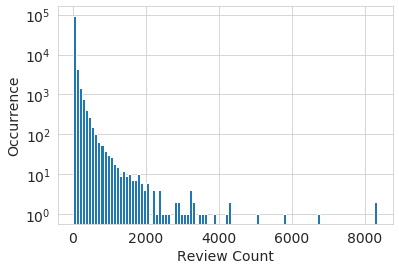

In [5]:
### Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [13]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [16]:
### Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
small_counts

array([65, 14,  2, 91, 78,  1, 37, 17, 40, 86, 11, 42, 55, 89, 48, 75, 89,
       38, 59, 63])

In [17]:
np.floor_divide(small_counts, 10)

array([6, 1, 0, 9, 7, 0, 3, 1, 4, 8, 1, 4, 5, 8, 4, 7, 8, 3, 5, 6])

In [18]:
### An array of counts that span several magnitudes
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [19]:
### Map to exponential-width bins via the log function
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

In [22]:
pd.qcut(small_counts,5)

[(60.6, 79.6], (0.999, 16.4], (0.999, 16.4], (79.6, 91.0], (60.6, 79.6], ..., (60.6, 79.6], (79.6, 91.0], (16.4, 41.2], (41.2, 60.6], (60.6, 79.6]]
Length: 20
Categories (5, interval[float64]): [(0.999, 16.4] < (16.4, 41.2] < (41.2, 60.6] < (60.6, 79.6] < (79.6, 91.0]]

In [13]:
# yelp 商户评论数的十分位数
deciles=biz_df['review_count'].quantile(np.arange(0.1,1,0.1))
deciles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     6.0
0.5     9.0
0.6    13.0
0.7    19.0
0.8    33.0
0.9    69.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurrence')

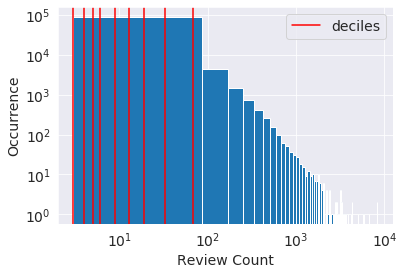

In [16]:
### Visualize the deciles on the histogram
sns.set_style('darkgrid')
fig,ax=plt.subplots()
biz_df['review_count'].hist(ax=ax,bins=100)
for pos in deciles:
    handle=plt.axvline(pos,color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

为了计算分位数和映射数据到分位数箱，我们可以使用 Pandas 库。 
> 1. pandas.DataFrame.quantile 和 pandas.Series.quantile 用于计算分位数。
> 2. pandas.qcut将数据映射到所需数量的分位数

##### 对数变换
- 对数变换是处理具有重尾分布的正数的有力工具。（重尾分布在尾部范围内的概率比高斯分布的概率大）
- 它将分布在高端的长尾压缩成较短的尾部，并将低端扩展成较长的头部

Text(0, 0.5, 'Occurrence')

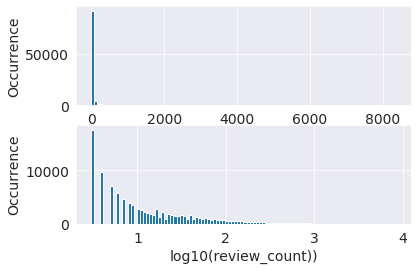

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count']=np.log10(biz_df['review_count'])
biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

##### 使用对数转换 YELP 评论数预测平均商户评级
> 模型由 R 方评分来评估, 它测量训练后的回归模型预测新数据的良好程度。
好的模型有较高的 R 方分数。
> 一个完美的模型得到最高分1。分数可以是负的, 
> 一个坏的模型可以得到一个任意低的负评分。通过交叉验证, 我们不仅得到了分数的估计, 还获得了方差, 这有助于我们判断两种模型之间的差异是否有意义